In [ ]:
from gym import spaces
import numpy as np
# state = spaces.Box(low=(-6.7,0,0),high=(6.7,5.18,np.inf),shape=(1,3))
action_space = spaces.Box(low=np.array([-np.inf,-np.inf,-np.inf]),high=np.array([np.inf,np.inf,np.inf]),shape=(3,))
observation_space = spaces.Dict(spaces={
            "position": spaces.Box(low=np.array([-6.7,0,0]),high=np.array([6.7,5.18,np.inf]),shape=(3,)),
            "velocity": spaces.Box(low=np.array([-np.inf,-np.inf,-np.inf]),high=np.array([np.inf,np.inf,np.inf]),shape=(3,))
        })
# print(state.low, state.high)
print(observation_space.sample())

In [ ]:
from policy import RandomPolicy
p = RandomPolicy()
p.sample_action([5.9260006, 2.972114 , 1.0460908])
print([2,2]==(2,2))

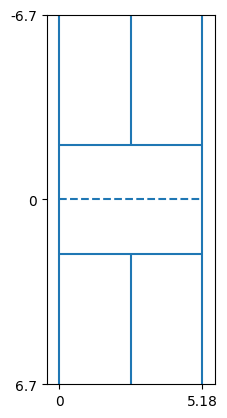

In [63]:
# plot a rough court in a 2d coorinate
import matplotlib.pyplot as plt
plt.xlim([-0.46,5.18+0.46])
plt.ylim([-6.7,6.7])
plt.xticks([0,5.18],["0","5.18"])
plt.yticks([-6.7,0,6.7],["-6.7","0","6.7"])
plt.vlines(x=[0,5.18],ymin=-6.7,ymax=6.7)
plt.vlines(x=5.18/2,ymin=1.98,ymax=6.7)
plt.vlines(x=5.18/2,ymax=-1.98,ymin=-6.7)
plt.hlines(y=[1.98,-1.98],xmin=0,xmax=5.18)
plt.hlines(y=[0],xmin=0,xmax=5.18,linestyles='--')

# plt.gca().spines['bottom'].set_position(('data',0))
plt.gca().set_aspect(1)
plt.gca().invert_yaxis()
plt.savefig("image/court_2d.png",dpi=300, bbox_inches='tight')

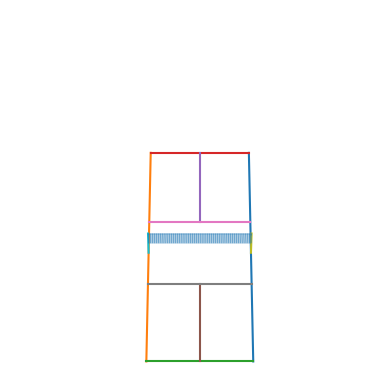

In [57]:
import matplotlib.pyplot as plt
ax = plt.axes(projection='3d')

ax.set_xlim([-0.46,5.18+0.46])
ax.set_ylim([6.7,-6.7])
ax.set_zlim([0,10])
plt.xticks([0,5.18],["0","5.18"])
plt.yticks([-6.7,0,6.7],["-6.7","0","6.7"])
# bound
plt.plot(xs=[0,0],ys=[-6.7,6.7],zs=0)
plt.plot(xs=[5.18,5.18],ys=[-6.7,6.7],zs=0)
plt.plot(xs=[0,5.18],ys=[-6.7,-6.7],zs=0)
plt.plot(xs=[0,5.18],ys=[6.7,6.7],zs=0)
# mid line
plt.plot(xs=[5.18/2,5.18/2],ys=[1.98,6.7],zs=0)
plt.plot(xs=[5.18/2,5.18/2],ys=[-1.98,-6.7],zs=0)
# serve line
plt.plot(ys=[1.98,1.98],xs=[0,5.18],zs=0)
plt.plot(ys=[-1.98,-1.98],xs=[0,5.18],zs=0)
# net
plt.plot(ys=[0,0],xs=[0,0],zs=[0,1.55])
plt.plot(ys=[0,0],xs=[5.18,5.18],zs=[0,1.55])

x = np.linspace(0,5.18)
z = np.linspace(1.55-0.78, 1.55)
X,Z = np.meshgrid(x,z)
Y = np.zeros((50,50))
ax.plot_wireframe(X,Y,Z, rstride=5, cstride=1,linewidth=0.3)
# plt.plot(ys=[0,0],xs=[0,5.18],zs=0,linestyle='--')
# plt.plot(ys=[0,0],xs=[0,5.18],zs=0,linestyle='--')
# plt.plot(ys=[0,0],xs=[0,5.18],zs=0,linestyle='--')

ax.grid(False)#默认True，风格线。

plt.axis('off')#关闭所有坐标轴
plt.gca().set_box_aspect((6.1, 13.4, 10))
ax.view_init(50, 90, 'z')
# ax.view_init(0, 0, 'z')
# plt.savefig("image/court_3d.png",dpi=300, bbox_inches='tight')

MovieWriter ffmpeg unavailable; using Pillow instead.


(1231, 3)


<Figure size 640x480 with 0 Axes>

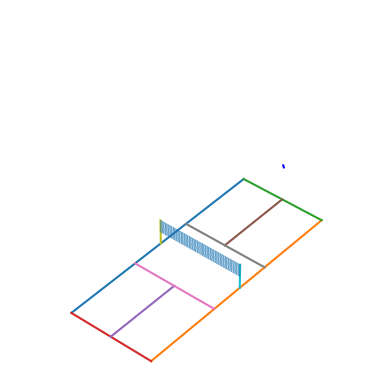

In [2]:
import matplotlib.pyplot as plt
import pickle as pkl
import numpy as np
from matplotlib import animation
# plt setting
plt.clf()
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_xlim([-0.46,5.18+0.46])
ax.set_ylim([6.7,-6.7])
ax.set_zlim([0,10])
plt.xticks([0,5.18],["0","5.18"])
plt.yticks([-6.7,0,6.7],["-6.7","0","6.7"])
ax.grid(False)
plt.axis('off')
plt.gca().set_box_aspect((6.1, 13.4, 10))
ax.view_init(0, 90, 'z')
# bound
plt.plot(xs=[0,0],ys=[-6.7,6.7],zs=0)
plt.plot(xs=[5.18,5.18],ys=[-6.7,6.7],zs=0)
plt.plot(xs=[0,5.18],ys=[-6.7,-6.7],zs=0)
plt.plot(xs=[0,5.18],ys=[6.7,6.7],zs=0)
# mid line
plt.plot(xs=[5.18/2,5.18/2],ys=[1.98,6.7],zs=0)
plt.plot(xs=[5.18/2,5.18/2],ys=[-1.98,-6.7],zs=0)
# serve line
plt.plot(ys=[1.98,1.98],xs=[0,5.18],zs=0)
plt.plot(ys=[-1.98,-1.98],xs=[0,5.18],zs=0)
# net
plt.plot(ys=[0,0],xs=[0,0],zs=[0,1.55])
plt.plot(ys=[0,0],xs=[5.18,5.18],zs=[0,1.55])
x = np.linspace(0,5.18)
z = np.linspace(1.55-0.78, 1.55)
X,Z = np.meshgrid(x,z)
Y = np.zeros((50,50))
ax.plot_wireframe(X,Y,Z, rstride=5, cstride=1,linewidth=0.3)

with open("data/ball_track.pkl", "rb") as f:
    track = pkl.load(f)
track = np.array(track)

i = 0
line, = ax.plot(xs=track[i:i+2,1],ys=track[i:i+2,0],zs=track[i:i+2,2],c="b")
print(track.shape)
def update(i):
    if i+2<=track.shape[0]:
        line.set_data(track[i:i+2,1],track[i:i+2,0])
        line.set_3d_properties(track[i:i+2,2])
    else:
        pass
    return
def init():
    return
ani=animation.FuncAnimation(fig=fig,func=update,frames=track.shape[0]-2+40*5,init_func=init,interval=25,blit=False,repeat=False)
ax.view_init(40, -50, 'z')
ani.save("game_40_-50.gif")
# ax.view_init(0, 0, 'z')
# ani.save("game_0_0.gif")
# ani.save("game.gif")